#### 1. 划分数据集

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
import pandas as pd
#分块处理大文件
# chunk_iter = pd.read_csv("data/train_data.csv", chunksize=10000)
# chunks = [chunk for chunk in chunk_iter]
# train_data = pd.concat(chunks)
train_data = pd.read_csv("train/train.csv")
test_data = pd.read_csv("testaa/testaa.csv")
'''
train_data = train_data.drop(columns='issueDate')
test_data = test_data.drop(columns='issueDate')
'''
'''#截取前10000行数据
train_data=train_data.iloc[:10000,2:] '''
'''
# 划分特征变量与目标变量
X=train_data.drop(columns='isDefault')
Y=train_data['isDefault']
# 划分训练及测试集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
'''
train_data = train_data.drop(columns=['level','id'])
test_data = test_data.drop(columns=['level','id'])
train_data = train_data.fillna(train_data.median())
test_data = test_data.fillna(test_data.median())
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53480 entries, 0 to 53479
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             53480 non-null  int64  
 1   career            53480 non-null  float64
 2   zip_code          53480 non-null  int64  
 3   residence         53480 non-null  int64  
 4   loan              53480 non-null  int64  
 5   term              53480 non-null  int64  
 6   interest_rate     53480 non-null  float64
 7   issue_time        53480 non-null  int64  
 8   syndicated        53480 non-null  int64  
 9   installment       53480 non-null  int64  
 10  record_time       53480 non-null  int64  
 11  history_time      53480 non-null  int64  
 12  total_accounts    53480 non-null  float64
 13  balance_accounts  53480 non-null  float64
 14  balance_limit     53480 non-null  float64
 15  balance           53480 non-null  float64
 16  label             53480 non-null  int64 

In [23]:
from sklearn.model_selection import train_test_split
 
feature_list = [col for col in train_data.columns if col != "label"]
for fea in feature_list:
    train_data[fea] = train_data[fea].astype('int64')
    test_data[fea] = test_data[fea].astype('int64')
X_train, X_validation, y_train, y_validation = train_test_split(train_data.loc[:, feature_list], train_data.loc[:, 'label'], test_size=0.2 , random_state=2000)

#### 2.权重统计

0:	learn: 0.6543447	total: 2.73ms	remaining: 271ms
1:	learn: 0.6228042	total: 5.64ms	remaining: 276ms
2:	learn: 0.5969390	total: 8.19ms	remaining: 265ms
3:	learn: 0.5752294	total: 10.8ms	remaining: 258ms
4:	learn: 0.5570656	total: 13.7ms	remaining: 261ms
5:	learn: 0.5418275	total: 16.5ms	remaining: 259ms
6:	learn: 0.5289837	total: 19.4ms	remaining: 258ms
7:	learn: 0.5186103	total: 22ms	remaining: 253ms
8:	learn: 0.5096824	total: 24.5ms	remaining: 248ms
9:	learn: 0.5022399	total: 27.2ms	remaining: 245ms
10:	learn: 0.4959314	total: 29.9ms	remaining: 242ms
11:	learn: 0.4907787	total: 32.6ms	remaining: 239ms
12:	learn: 0.4862800	total: 35.3ms	remaining: 236ms
13:	learn: 0.4824052	total: 37.8ms	remaining: 232ms
14:	learn: 0.4790095	total: 40.7ms	remaining: 231ms
15:	learn: 0.4761079	total: 43.3ms	remaining: 227ms
16:	learn: 0.4734493	total: 46.5ms	remaining: 227ms
17:	learn: 0.4715783	total: 49.1ms	remaining: 224ms
18:	learn: 0.4698725	total: 51.9ms	remaining: 221ms
19:	learn: 0.4683979	tot

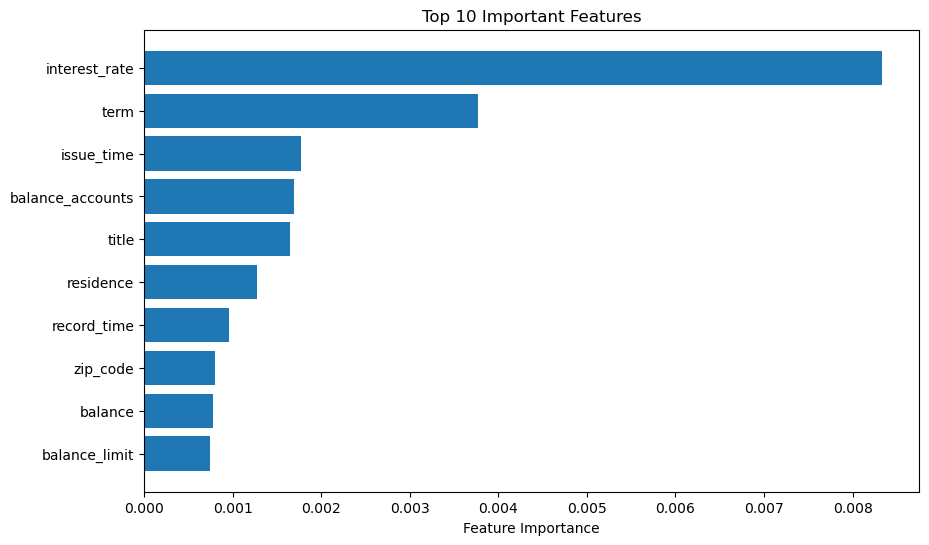

Feature 0: 0.001649956269124342
Feature 1: 0.0002831256170082175
Feature 2: 0.0008029729319585788
Feature 3: 0.0012746595783216241
Feature 4: 0.0006264985944720025
Feature 5: 0.0037714257882974223
Feature 6: 0.008334249086438483
Feature 7: 0.001769050300544639
Feature 8: 6.43478870731573e-05
Feature 9: 0.00014445377778915525
Feature 10: 0.0009545708039426226
Feature 11: 0.0004464995013954698
Feature 12: 0.0005799532963328691
Feature 13: 0.0016903999686426752
Feature 14: 0.0007484164563382745
Feature 15: 0.0007819223969348088


In [24]:
import catboost
from catboost import CatBoostClassifier
from catboost.utils import get_roc_curve
# 获取类别特征索引（假设X_train是DataFrame）
cat_features_idx = [i for i, col in enumerate(X_train.columns) 
                    if X_train[col].dtype == 'object']  
# 创建并训练一个CatBoost分类器
model = CatBoostClassifier(iterations=100, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           cat_features=cat_features_idx)
model.fit(X_train, y_train)
# 假设 df 是你的 Pandas DataFrame
train_data = catboost.Pool(data=X_train, label=y_train)
# 获取特征重要性评估
feature_importance = model.get_feature_importance(data=train_data, type='LossFunctionChange')
# 获取特征名称
feature_names = train_data.get_feature_names()
# 将特征重要性和特征名称结合起来，创建一个字典
feature_importance_dict = dict(zip(feature_names, feature_importance))

# 将特征重要性排序
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 提取排序后的特征名称和重要性
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10], sorted_feature_importance[:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # 反转y轴以显示重要性高的特征在顶部
plt.show()
# 打印特征重要性得分
for i, score in enumerate(feature_importance):
    print(f'Feature {i}: {score}')

In [27]:
# 3. 模型建立与训练
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000, cat_features=feature_list, eval_metric='AUC', logging_level='Verbose', learning_rate=0.05, depth=6, l2_leaf_reg=5, loss_function='CrossEntropy')
model.fit(X_train.loc[:, feature_list], y_train, 
          eval_set=(X_validation.loc[:, feature_list], y_validation), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.5854986	best: 0.5854986 (0)	total: 80.2ms	remaining: 1m 20s
1:	test: 0.5971247	best: 0.5971247 (1)	total: 141ms	remaining: 1m 10s
2:	test: 0.5971247	best: 0.5971247 (1)	total: 156ms	remaining: 52s
3:	test: 0.5989092	best: 0.5989092 (3)	total: 236ms	remaining: 58.7s
4:	test: 0.5976309	best: 0.5989092 (3)	total: 310ms	remaining: 1m 1s
5:	test: 0.6011324	best: 0.6011324 (5)	total: 392ms	remaining: 1m 5s
6:	test: 0.6048134	best: 0.6048134 (6)	total: 479ms	remaining: 1m 7s
7:	test: 0.6031925	best: 0.6048134 (6)	total: 555ms	remaining: 1m 8s
8:	test: 0.6018859	best: 0.6048134 (6)	total: 626ms	remaining: 1m 8s
9:	test: 0.6028490	best: 0.6048134 (6)	total: 685ms	remaining: 1m 7s
10:	test: 0.6028490	best: 0.6048134 (6)	total: 710ms	remaining: 1m 3s
11:	test: 0.6020289	best: 0.6048134 (6)	total: 761ms	remaining: 1m 2s
12:	test: 0.6057613	best: 0.6057613 (12)	total: 839ms	remaining: 1m 3s
13:	test: 0.6052264	best: 0.6057613 (12)	total: 869ms	remaining: 1m 1s
14:	test: 0.6068379	best: 0

In [ ]:
# 4.测试集预测
preds = model.predict_proba(test_data[feature_list])
preds


array([[0.92087715, 0.07912285],
       [0.71542053, 0.28457947],
       [0.62919857, 0.37080143],
       ...,
       [0.74120586, 0.25879414],
       [0.68797578, 0.31202422],
       [0.9513777 , 0.0486223 ]])

In [ ]:
test_data['isDefault'] = preds[:, 1]  # 取正类的概率存储
test_data[['id', 'isDefault']].to_csv('submission.csv', index=False)